## Stats 211 Problem set 2

[your name] Luis Ruben Gonzalez

[working title of the project] Grant and loan repayment data in public research universities

[date] 02/19/2020

### 1. Explain any new or revised hypotheses for interval ratio data from your own project or from Charlie's grant and loan repayment data

[Your answer here should explain:
1. What are your dependent variables? Why do they interest you? 
2. What are your independent variables? What direction to you hypothesize will be the relationship between your dependent variable and your dependent variables?
3. Why do you think your dependent variables are associated with your independent variables?
4. What are your control variables? Do you think they will show any spurious, intervening, or interactive relationships? Why?]

If you are working with the grant and loan repayment data, formulate hypotheses about:
1. The relationship between state grant aid per student and the level of research at a university
** If the level of research in a university is higher, then the likelihood of students to receive a state grant aid increases. 

The independent variable in this case is the level of research in public universities (with the 4 leves of interval)

The dependent variable is state grant aid per student reached by those institutions. 

2. The relationship between loan repayment and college net price for low-income students. The later variable is name **netprice4lowincome**
If college net price is higher, then loan repayment is lower among low-income students

The independent variable is college net prices for low income students

And the dependent variable is the percentage of loan repayment among low-income students

As an interactive variable, notwithstanding, it is important to consider state and institutional grants, since receiving either, both or none mediates the outcome of loan repayment (reducing the effect of prices in the first two cases, and increasing it in the latter). 


### 2. Setting up your session

In the code cell below, do the following:

1. set current directory 
2. set more off 

3. create log file

4. download the data from its source if it's available online

5. read the data in [preferably only variables you are going to use]


In [ ]:
cd "/home/rub/Dropbox/Archivos en curso/Sociology Merced/Spring 2020/Grad Stats II/Research Project/Assignment 3"
set more off
log using researchassignment3_rub_log20200220.smcl
insheet using loanrepay2013_highestresearch.csv, clear
describe
ds, varwidth (32)


/home/rub/Dropbox/Archivos en curso/Sociology Merced/Spring 2020/Grad Stats II/Research Project/Assignment 3


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /home/rub/Dropbox/Archivos en curso/Sociology Merced/Spring 2020/Grad Stats II/Research Project/Assignment 3/researchassignment3_rub_log20200220.smcl
  log type:  smcl
 opened on:  25 Feb 2020, 13:01:46

(19 vars, 33 obs)


Contains data
  obs:            33                          
 vars:            19                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
        

In [ ]:
keep netprice4lowincome sgrnt_low_inc y_lo_inc_rpy

### 3. Create a bar graph with confidence interval whiskers

Create a bar graph that compares interval ratio data for a dependent variable across different nominal categories from an independent variable. If you are using Charlie's data, do this for the state grant aid per low income student variable name **sgrnt_low**. 
***Note: I used the variables I defined as dependent (percentage of loan repayment) and independent variable (college price for low income students). I just divided the last one into 4 groups of values.  


In [ ]:
tab y_lo_inc_rpy, m
tab netprice4lowincome, m
egen netpricelinc3  = cut(netprice4lowincome), group(4) label



Y_lo_inc_rp |
          y |      Freq.     Percent        Cum.
------------+-----------------------------------
    47.9304 |          1        3.03        3.03
    50.4668 |          1        3.03        6.06
     55.709 |          1        3.03        9.09
    56.1845 |          1        3.03       12.12
    57.0114 |          1        3.03       15.15
    57.2512 |          1        3.03       18.18
    57.5044 |          1        3.03       21.21
    58.3367 |          1        3.03       24.24
    60.4167 |          1        3.03       27.27
    60.8015 |          1        3.03       30.30
    61.0008 |          1        3.03       33.33
    62.6499 |          1        3.03       36.36
    63.0356 |          1        3.03       39.39
    63.6468 |          1        3.03       42.42
    64.5707 |          1        3.03       45.45
    66.5521 |          1        3.03       48.48
    67.2012 |          1        3.03       51.52
    68.2734 |          1        3.03       54.55
    

In [ ]:
tab netprice4lowincome netpricelinc3, m nol
tab netprice4lowincome netpricelinc3, m
lab define pricefmt 0 "Low Price" 1 "Low Middle Price" 2 "High Middle Price" 3 "High price"
lab values netpricelinc3 pricefmt



netprice4l |                netpricelinc3
  owincome |         0          1          2          3 |     Total
-----------+--------------------------------------------+----------
  3554.292 |         1          0          0          0 |         1 
  4379.849 |         1          0          0          0 |         1 
  4504.875 |         1          0          0          0 |         1 
  4904.862 |         1          0          0          0 |         1 
   5099.45 |         1          0          0          0 |         1 
  5615.022 |         1          0          0          0 |         1 
   5882.25 |         1          0          0          0 |         1 
   6417.48 |         1          0          0          0 |         1 
  7102.093 |         0          1          0          0 |         1 
  7188.779 |         0          1          0          0 |         1 
  7381.495 |         0          1          0          0 |         1 
  7582.553 |         0          1          0          0 |    

In [ ]:
bysort netpricelinc3: egen mn_loan_rep=mean(y_lo_inc_rpy)
gen sqdv_loan_rep=(mn_loan_rep-y_lo_inc_rpy)^2
collapse ///
(count) n=y_lo_inc_rpy /// 
(first) mn_loan_rep ///
(sum) ssqdv_loan_rep= sqdv_loan_rep ///
, by(netpricelinc3)
gen sd_loan_rep=sqrt(ssqdv_loan_rep/(n-1))
gen se_loan_rep= sd_loan_rep/sqrt(n-1)
generate hisloan_rep = mn_loan_rep + 1.96*se_loan_rep
generate losloan_rep = mn_loan_rep - 1.96*se_loan_rep 

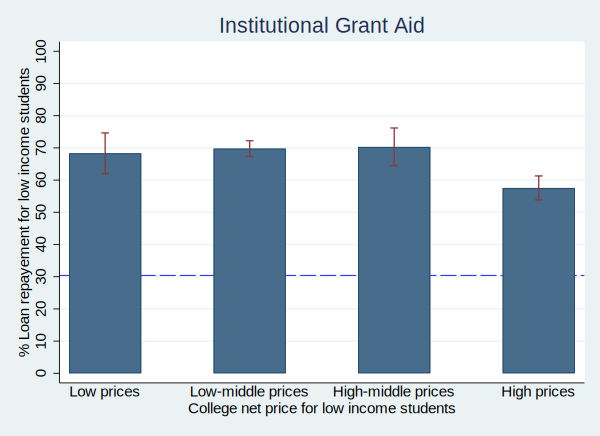

In [ ]:
graph twoway (bar mn_loan_rep netpricelinc3, barw(.5)) ///
(rcap hisloan_rep losloan_rep netpricelinc3), ///
xlabel( 0 "Low prices" 1 "Low-middle prices" 2 "High-middle prices" 3 "High prices", noticks) ///
ytitle("% Loan repayement for low income students") ///
ylabel(0(10)100, format(%10.0fc)) ///
xtitle("College net price for low income students") legend(off) name(igrntbar, replace) ///
title("Institutional Grant Aid") ///
yline(1936.825, lp(_) lcolor(blue) lstyle(foreground))

### 4. Summarize what you learned from the bar graph

Do the confidence intervals overlap across categories or not? What does this mean?

**Considering the values under the confidence intervals, there is not a significant difference in the percentage of loan repayement when the prices were low (between 3554.292 and 7102.092 dollars), low-middle (7102.0943 and 8687.918 dollars) and high-middle (8687. 919 and 10057.88 dollars) for low income students. The value kept around 67 and 70 percent. The reduction in the payement percentage was more noticeable when the prices were high (equal or greater than 10057.89.

**The confidence intervals are not equally distributed among these categories: percentage of repayment for low income students paying low prices and high-middle prices were greater than the other categories, which means that these cases presented values far below or above the mean than the others. Meanwhile, the percentage of loan repayment for low income students facing low-middle prices had the smallest interval whisker, that is, had values closer to the mean.  

### 4. Estimate OLS regression statistics for the relationship between two interval ratio variables and ouput the table below

If you use Charlie's data, use the loan repayment variable and the **netprice4lowincome** variable.

In [ ]:
import delimited using loanrepay2013_highestresearch.csv, clear case(preserve)
regress Y_lo_inc_rpy netprice4lowincome


(19 vars, 33 obs)


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(1, 31)        =      8.48
       Model |  473.546336         1  473.546336   Prob > F        =    0.0066
    Residual |  1730.93895        31  55.8367402   R-squared       =    0.2148
-------------+----------------------------------   Adj R-squared   =    0.1895
       Total |  2204.48528        32  68.8901651   Root MSE        =    7.4724

------------------------------------------------------------------------------------
      Y_lo_inc_rpy |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------------+----------------------------------------------------------------
netprice4lowincome |  -.0011662   .0004005    -2.91   0.007    -.0019829   -.0003495
             _cons |   76.56364   3.782187    20.24   0.000     68.84982    84.27746
-------------------------------------------------------------------------------

### 5. Interpret the output

1. What is the coefficient for your independent variable? What does it say about the size and direction of the relationship you estimated?

2. What is the p-value for the coefficient for your independent variable? What does it indicate about how much confidence we can have in the estimated relationship?

3. What is the $r^2$ coefficient of determination? What does it say about how much variation in your dependent variable is explained by the independent variable?

4. What is the F-ratio for your $r^2$. What does it indicate about how much confidence we can have in the $r^2$ estimate?



**1. The coefficient for the effect of College net price for low income students (predictor) to the percentage of loan repayment variable (outcome) is -.012. This indicates that an inversely proportional relationship: the greater the price, the smaller the payment percentage. 

**2. The P value for the effect of College net price for low income students (predictor) to the percentage of loan repayment variable (outcome) is .007 (α <.05). Therefore, the we can reject the null hypothesis of a lack of effect of College net price for low income students on loan repayment at the 95% level of confidence.

**3. The $r^2$ of the effect of of College net price for low income students (predictor) to the percentage of loan repayment variable (outcome) is .215. That means our college net price for low income students explains 21.5 percent of the variation of loan repayment. 

**4. The F-ratio for the effect of College net price for low income students (predictor) to the percentage of loan repayment variable (outcome) is 8.48. This value is significantly greater than the p value for F of 0.007. Therefore, the results reinforce our confidence on the results of the previous tests, since they indicate that we can reject the lack of explanatory value of our predictor (College net price for low income students) for our outcome (pecentage of loan repayment).


### 6. Illustrate the OLS relationship with a scatter plot that includes a fitted line

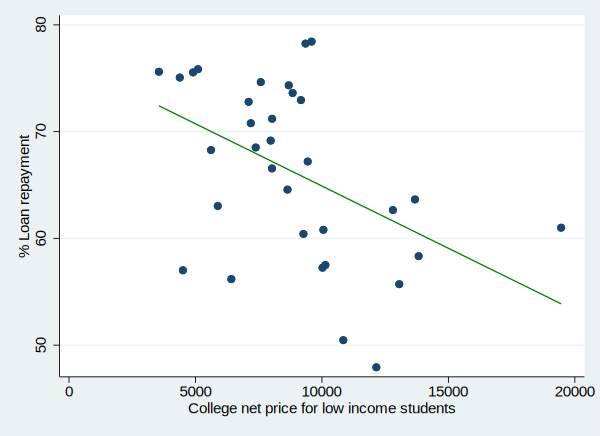

In [ ]:
tw (scatter Y_lo_inc_rpy netprice4lowincome) ///
(lfit Y_lo_inc_rpy netprice4lowincome, color(green)), ///
ytitle("% Loan repayment") ///
xtitle("College net price for low income students") legend(off)